In [1]:
import os
os.chdir("..")
!pwd

/home/andrew/Development/swapnet


In [2]:
from util.draw_rois import draw_rois_on_texture
from util.util import tensor2im
from PIL import Image, ImageDraw
import numpy as np

In [3]:
from argparse import Namespace

In [4]:
opt = Namespace(model="texture", is_train=True, batch_size=4, crop_bounds=None, crop_size=256, load_size=400, shuffle_data=False, dataset="texture", dataroot="data/video_data/andrew", input_transforms="all", cloth_channels=19, texture_channels=3, num_workers=1, max_dataset_size=200)
opt

Namespace(batch_size=4, cloth_channels=19, crop_bounds=None, crop_size=256, dataroot='data/video_data/andrew', dataset='texture', input_transforms='all', is_train=True, load_size=400, max_dataset_size=200, model='texture', num_workers=1, shuffle_data=False, texture_channels=3)

In [5]:
from datasets import create_dataset
dataset = create_dataset(opt)

Creating dataset texture... dataset [TextureDataset] was created


In [6]:
dataset

In [7]:
my_iter = iter(dataset)

In [8]:
data = next(iter(dataset))
textures, rois, cloths, targets = data["input_textures"], data["rois"], data["cloths"], data["target_textures"]

In [9]:
textures.shape

torch.Size([4, 3, 256, 256])

In [10]:
rois

tensor([[[159.,   0., 193.,  14.],
         [144.,  15., 206.,  89.],
         [255.,   0., 255.,   0.],
         [196.,  20., 215.,  94.],
         [144., 151., 180., 229.],
         [179., 151., 216., 226.],
         [156.,   1., 188.,  24.],
         [141.,  83., 215., 155.],
         [128.,  20., 160.,  82.],
         [206.,  92., 226., 158.],
         [145., 220., 168., 255.],
         [174., 217., 203., 255.]],

        [[147., 255., 183., 255.],
         [123., 255., 179., 255.],
         [  0., 255.,   0., 255.],
         [140., 255., 180., 255.],
         [123., 169., 155., 220.],
         [144., 168., 186., 224.],
         [144., 255., 172., 255.],
         [117., 216., 180., 255.],
         [  0., 255.,   0., 255.],
         [168., 214., 198., 255.],
         [103., 117., 141., 181.],
         [151., 110., 186., 171.]],

        [[180., 255., 211., 255.],
         [174., 255., 236., 255.],
         [242., 255., 255., 255.],
         [147., 255., 184., 255.],
         [208., 

In [11]:
import seaborn
BODY_COLORS = (np.array(seaborn.color_palette("hls", 12)) * 255).astype(np.uint8)
BODY_COLORS

array([[219,  94,  86],
       [219, 160,  86],
       [211, 219,  86],
       [145, 219,  86],
       [ 86, 219,  94],
       [ 86, 219, 160],
       [ 86, 211, 219],
       [ 86, 145, 219],
       [ 94,  86, 219],
       [160,  86, 219],
       [219,  86, 211],
       [219,  86, 145]], dtype=uint8)

In [12]:
x = draw_rois_on_texture(rois, textures)

In [13]:
x.shape

(4, 256, 256, 3)

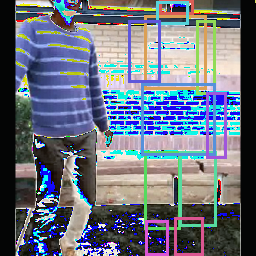

In [14]:
Image.fromarray(x[0])

In [15]:



r, t = next(zip(rois, textures))


im = Image.fromarray(tensor2im(t.unsqueeze_(0)))
draw = ImageDraw.Draw(im)



In [16]:
r

tensor([[159.,   0., 193.,  14.],
        [144.,  15., 206.,  89.],
        [255.,   0., 255.,   0.],
        [196.,  20., 215.,  94.],
        [144., 151., 180., 229.],
        [179., 151., 216., 226.],
        [156.,   1., 188.,  24.],
        [141.,  83., 215., 155.],
        [128.,  20., 160.,  82.],
        [206.,  92., 226., 158.],
        [145., 220., 168., 255.],
        [174., 217., 203., 255.]])

In [17]:
r[0]

tensor([159.,   0., 193.,  14.])

In [18]:
for i, c in enumerate(r):
    draw.rectangle(c.numpy(), outline=tuple(BODY_COLORS[i]), width=2)

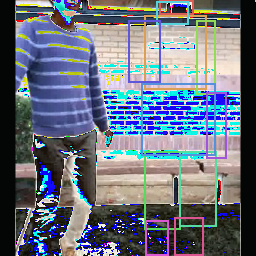

In [19]:
im

In [20]:
textures[0, :, rois[0,0] ].shape

IndexError: tensors used as indices must be long, byte or bool tensors

In [ ]:
from util.decode_labels import decode_cloth_labels

In [ ]:
im.size

In [ ]:
from util.util import tensor2im

In [ ]:
textures[0].shape